# Advance Regression Technique: Predicting house prices in Paris

<a id="table_of_contents"></a>
## Table of Contents

1. <a href="#download_dataset" style="text-decoration: none;">Download Dataset</a>
2. <a href="#import_libraries" style="text-decoration: none;">Import Libraries and Datasets</a>
3. <a href="#dataset_preview" style="text-decoration: none;">Dataset Preview</a>
4. <a href="#eda" style="text-decoration: none;">Exploratory Data Analysis</a>
5. <a href="#prepare" style="text-decoration: none;">Data Preparation and Preprocessing</a>
     - <a href="#outlier" style="text-decoration: none;">Outlier Detection and Removal</a>
     - <a href="#inputs_target" style="text-decoration: none;">Identify Inputs and Target Column</a>
     - <a href="#numeric_cat" style="text-decoration: none;">Identify Numeric and Categorical Column</a>
     - <a href="#scale_numeric" style="text-decoration: none;">Scale Numeric Values</a>
     - <a href="#encode_cat" style="text-decoration: none;">Encode Categorical Values</a>
     - <a href="#train_test_split" style="text-decoration: none;">Train Test Split</a>
6. <a href="#model" style="text-decoration: none;">Model Building</a>
    - <a href="#eva_metrics" style="text-decoration: none;">Regression Models Evaluation Metrics</a>
    - <a href="#linear_reg" style="text-decoration: none;">Linear Regression</a>
    - <a href="#random_forest" style="text-decoration: none;">Random Forest</a>
    - <a href="#ridge_reg" style="text-decoration: none;">Ridge Regression</a>
    - <a href="#lightgbm" style="text-decoration: none;">Light GBM</a>
    - <a href="#xgboost" style="text-decoration: none;">XGBoost</a>
    - <a href="#visualize_base" style="text-decoration: none;">Visualize Model Performance</a>
7. <a href="#hyperparameter" style="text-decoration: none;">Hyperparameter Tuning</a>
    - <a href="#hyper_xgboost" style="text-decoration: none;">XGBoost</a>
8. <a href="#model_visualize_interprete" style="text-decoration: none;">Model Visualization and Interpretation</a>
    - <a href="#model_visualize" style="text-decoration: none;">Visualization</a>
    - <a href="#model_interprete" style="text-decoration: none;">Feature Importance</a>
9. <a href="#submission" style="text-decoration: none;">Submission</a>
10. <a href="#save_model" style="text-decoration: none;">Save Model</a>

<a id="download_dataset"></a>
## 1. Download Dataset

I have downloaded the dataset directly within the Jupyter notebook using the `opendatasets` library. 

In [1]:
import os 
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/competitions/playground-series-s3e6/")

Skipping, found downloaded files in ".\playground-series-s3e6" (use force=True to force download)


In [3]:
os.listdir("playground-series-s3e6")

['sample_submission.csv', 'test.csv', 'train.csv']

<a id="import_libraries"></a>
## 2. Import Libraries and Dataset
<a href="#table_of_contents" style="text-decoration: none;">Table of Content</a>

In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

import warnings 
warnings.filterwarnings("ignore")

In [5]:
train_df = pd.read_csv("playground-series-s3e6/train.csv")
test_df = pd.read_csv("playground-series-s3e6/test.csv")
submission_df = pd.read_csv("playground-series-s3e6/sample_submission.csv")

<a id="dataset_preview"></a>
## 3. Dataset Preview
<a href="#table_of_contents" style="text-decoration: none;">Table of Content</a>

In [6]:
train_df

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0          0         34291             24        1        0      47     35693   
1          1         95145             60        0        1      60     34773   
2          2         92661             45        1        1      62     45457   
3          3         97184             99        0        0      59     15113   
4          4         61752            100        0        0      57     64245   
...      ...           ...            ...      ...      ...     ...       ...   
22725  22725         55825             84        1        0      70     12031   
22726  22726         65870             88        1        0      49     23197   
22727  22727         93192             42        1        0      39      8539   
22728  22728         65797             86        1        0      89     23197   
22729  22729         82244             18        1        0      38     86728   

       cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                  2              1  2000           0                  1   
1                  1              4  2000           0                  1   
2                  4              8  2020           1                  1   
3                  1              1  2000           0                  1   
4                  8              4  2018           1                  0   
...              ...            ...   ...         ...                ...   
22725              3             10  2000           0                  0   
22726              9              9  2015           0                  1   
22727             10              5  2014           1                  0   
22728              2             10  2000           1                  0   
22729              1              9  2018           1                  0   

       basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0             8   5196     369               0             3  3436795.2  
1           729   4496     277               0             6  9519958.0  
2          7473   8953     245               1             9  9276448.1  
3          6424   8522     256               1             9  9725732.2  
4          7151   2786     863               0             7  6181908.8  
...         ...    ...     ...             ...           ...        ...  
22725      4477    786     345               0             0  5594137.1  
22726      4811   2454     755               0             7  6594705.0  
22727      5595   4072     789               0             0  9321511.4  
22728      5358   2513     411               0             0  6584708.2  
22729      6294   1291     572               0             6  8231424.8  

[22730 rows x 18 columns]

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [8]:
train_df.nunique()

id                   22730
squareMeters          7319
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 101
cityCode              7810
cityPartRange           10
numPrevOwners           10
made                    33
isNewBuilt               2
hasStormProtector        2
basement              4903
attic                 5167
garage                 896
hasStorageRoom           2
hasGuestRoom            11
price                 7421
dtype: int64

In [9]:
train_df.describe().T

count          mean           std      min         25%  \
id                 22730.0  1.136450e+04  6.561730e+03      0.0     5682.25   
squareMeters       22730.0  4.658622e+04  4.952124e+04     89.0    20392.75   
numberOfRooms      22730.0  4.824109e+01  2.822643e+01      1.0       25.00   
hasYard            22730.0  4.758909e-01  4.994294e-01      0.0        0.00   
hasPool            22730.0  4.527497e-01  4.977733e-01      0.0        0.00   
floors             22730.0  4.730598e+01  4.777721e+01      1.0       25.00   
cityCode           22730.0  5.001380e+04  3.000664e+04      3.0    22936.00   
cityPartRange      22730.0  5.585042e+00  2.739533e+00      1.0        3.00   
numPrevOwners      22730.0  5.620766e+00  2.713026e+00      1.0        3.00   
made               22730.0  2.008005e+03  1.188268e+02   1990.0     2000.00   
isNewBuilt         22730.0  4.679718e-01  4.989841e-01      0.0        0.00   
hasStormProtector  22730.0  4.600088e-01  4.984091e-01      0.0        0.00   
basement           22730.0  5.283647e+03  3.047084e+03      4.0     2977.25   
attic              22730.0  5.067982e+03  3.097348e+03      1.0     2599.00   
garage             22730.0  5.304696e+02  2.748406e+02      4.0      297.00   
hasStorageRoom     22730.0  4.616806e-01  4.985404e-01      0.0        0.00   
hasGuestRoom       22730.0  5.153058e+00  3.055246e+00      0.0        3.00   
price              22730.0  4.634457e+06  2.925163e+06  10313.5  2041739.10   

                         50%         75%         max  
id                   11364.5    17046.75     22729.0  
squareMeters         44484.0    71547.00   6071330.0  
numberOfRooms           47.0       75.00       100.0  
hasYard                  0.0        1.00         1.0  
hasPool                  0.0        1.00         1.0  
floors                  45.0       69.00      6000.0  
cityCode             50414.0    76291.00    491100.0  
cityPartRange            6.0        8.00        10.0  
numPrevOwners            6.0        8.00        10.0  
made                  2006.0     2014.00     10000.0  
isNewBuilt               0.0        1.00         1.0  
hasStormProtector        0.0        1.00         1.0  
basement              5359.0     7746.00     91992.0  
attic                 4977.0     7652.00     96381.0  
garage                 515.0      767.00      9017.0  
hasStorageRoom           0.0        1.00         1.0  
hasGuestRoom             5.0        8.00        10.0  
price              4450823.4  7159919.50  10004278.3

<a id="eda"></a>
## 4. Exploratory Data Analysis
<a href="#table_of_contents" style="text-decoration: none;">Table of Content</a>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("darkgrid")

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)
train_df['price'].describe().T

count      22730.00
mean     4634456.90
std      2925163.24
min        10313.50
25%      2041739.10
50%      4450823.40
75%      7159919.50
max     10004278.30
Name: price, dtype: float64

### 4.1 Distribution of house prices 

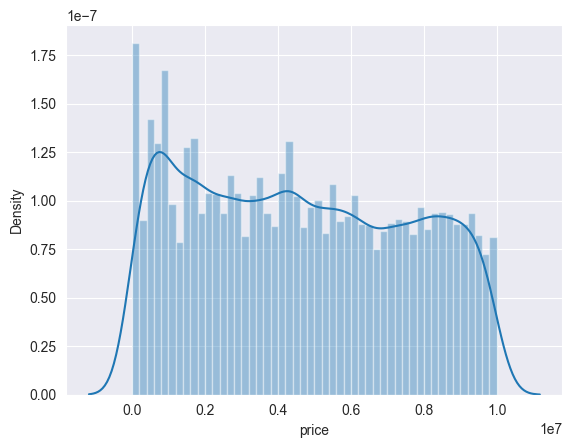

In [12]:
sns.distplot(train_df['price'], bins=50);

### 4.2 `squareMeters` vs `price`

In [13]:
train_df['squareMeters'].unique().max()

6071330

In [14]:
data = train_df[train_df['squareMeters']  < 100000]

In [15]:
px.scatter(data, x='squareMeters', y='price', color='hasPool')

### 4.3. Correlation Matrix

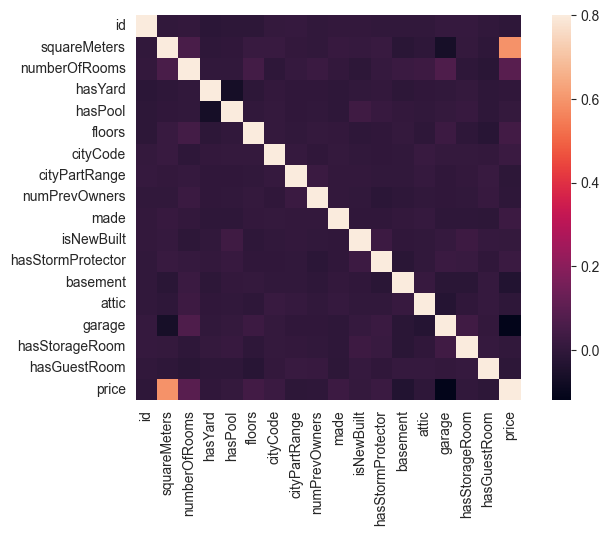

In [16]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

### 4.4. `numPrevOwners` vs `price`

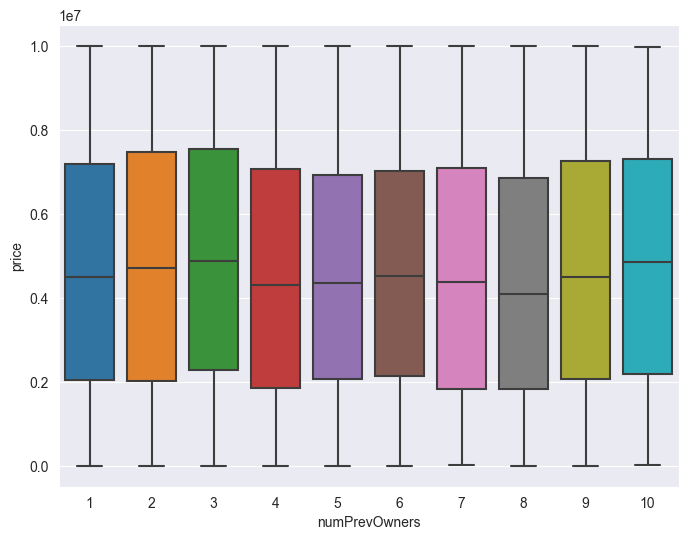

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='numPrevOwners', y="price", data=train_df)

<a id="prepare"></a>
## 5. Data Preparation and Preprocessing

<a href="#table_of_contents" style="text-decoration: none;">Table of Content</a>

<a id="outlier"></a>
### 5.1 Outlier Detection and Removal

Using descriptive statistics and boxplot visualization, there appears to be few outliers in following columns: 
- `squareMeters`: 75 percent of the houses have a square meters below 71547 
- `basement`: according to the boxplot, the `basement` column contains about three outliers with extreme value of about 80000
- `made`: there appears to be an error in this column. The year of course can't go up to 10000

In [18]:
train_df.describe().T

count       mean        std      min        25%  \
id                22730.00   11364.50    6561.73     0.00    5682.25   
squareMeters      22730.00   46586.22   49521.24    89.00   20392.75   
numberOfRooms     22730.00      48.24      28.23     1.00      25.00   
hasYard           22730.00       0.48       0.50     0.00       0.00   
hasPool           22730.00       0.45       0.50     0.00       0.00   
floors            22730.00      47.31      47.78     1.00      25.00   
cityCode          22730.00   50013.80   30006.64     3.00   22936.00   
cityPartRange     22730.00       5.59       2.74     1.00       3.00   
numPrevOwners     22730.00       5.62       2.71     1.00       3.00   
made              22730.00    2008.01     118.83  1990.00    2000.00   
isNewBuilt        22730.00       0.47       0.50     0.00       0.00   
hasStormProtector 22730.00       0.46       0.50     0.00       0.00   
basement          22730.00    5283.65    3047.08     4.00    2977.25   
attic             22730.00    5067.98    3097.35     1.00    2599.00   
garage            22730.00     530.47     274.84     4.00     297.00   
hasStorageRoom    22730.00       0.46       0.50     0.00       0.00   
hasGuestRoom      22730.00       5.15       3.06     0.00       3.00   
price             22730.00 4634456.90 2925163.24 10313.50 2041739.10   

                         50%        75%         max  
id                  11364.50   17046.75    22729.00  
squareMeters        44484.00   71547.00  6071330.00  
numberOfRooms          47.00      75.00      100.00  
hasYard                 0.00       1.00        1.00  
hasPool                 0.00       1.00        1.00  
floors                 45.00      69.00     6000.00  
cityCode            50414.00   76291.00   491100.00  
cityPartRange           6.00       8.00       10.00  
numPrevOwners           6.00       8.00       10.00  
made                 2006.00    2014.00    10000.00  
isNewBuilt              0.00       1.00        1.00  
hasStormProtector       0.00       1.00        1.00  
basement             5359.00    7746.00    91992.00  
attic                4977.00    7652.00    96381.00  
garage                515.00     767.00     9017.00  
hasStorageRoom          0.00       1.00        1.00  
hasGuestRoom            5.00       8.00       10.00  
price             4450823.40 7159919.50 10004278.30

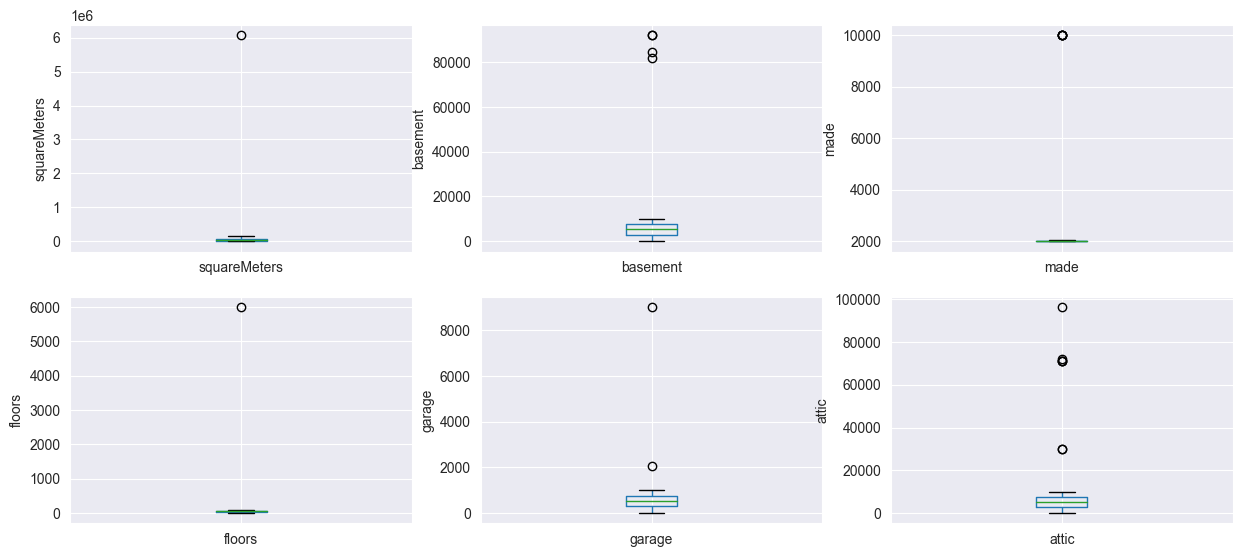

In [19]:
# Boxplots to visualize outliers
outlier_columns = ['squareMeters', 'basement', 'made', 'floors', 'garage', 'attic']

def plot_outliers(outlier_columns):
    plt.figure(figsize=(15,10))
    
    for idx, column in enumerate(outlier_columns):
        plt.subplot(3, 3, idx+1)
        fig = train_df.boxplot(column=column)
        fig.set_ylabel(column)
        

plot_outliers(outlier_columns)

In [20]:
train_df['made'].unique()

array([ 2000,  2020,  2018,  1998,  2017,  2003,  1994,  1993,  2009,
        2014,  2011,  1996,  2015,  2004,  2019,  2008,  2005,  2007,
        2016,  1995,  2006,  1997,  2013,  2021,  1999,  2001,  1990,
        2010,  1991,  2012,  1992, 10000,  2002], dtype=int64)

In [21]:
def fix_outlier(column):
    IQR = train_df[column].quantile(0.75) - train_df[column].quantile(0.25)
    Lower_fence = train_df[column].quantile(0.25) - (IQR * 3)
    Upper_fence = train_df[column].quantile(0.75) + (IQR * 3)
    print('{column_name} outliers are values < {lowerboundary} or > {upperboundary}'.format(column_name=column, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    return train_df[train_df[column] <= Upper_fence]
    

for column in outlier_columns:
    train_df = fix_outlier(column)

squareMeters outliers are values < -133070.0 or > 225009.75
basement outliers are values < -11330.0 or > 22053.0
made outliers are values < 1958.0 or > 2056.0
floors outliers are values < -107.0 or > 201.0
garage outliers are values < -1113.0 or > 2177.0
attic outliers are values < -12560.0 or > 22811.0


In [22]:
# Confirm outliers have been fixed
train_df.describe().T

count       mean        std      min        25%  \
id                22711.00   11363.85    6561.47     0.00    5684.50   
squareMeters      22711.00   46312.79   29248.43    89.00   20392.00   
numberOfRooms     22711.00      48.23      28.23     1.00      25.00   
hasYard           22711.00       0.48       0.50     0.00       0.00   
hasPool           22711.00       0.45       0.50     0.00       0.00   
floors            22711.00      47.04      26.90     1.00      25.00   
cityCode          22711.00   50010.51   30008.73     3.00   22936.00   
cityPartRange     22711.00       5.58       2.74     1.00       3.00   
numPrevOwners     22711.00       5.62       2.71     1.00       3.00   
made              22711.00    2006.24       8.12  1990.00    2000.00   
isNewBuilt        22711.00       0.47       0.50     0.00       0.00   
hasStormProtector 22711.00       0.46       0.50     0.00       0.00   
basement          22711.00    5269.38    2844.45     4.00    2977.50   
attic             22711.00    5049.90    2898.54     1.00    2599.00   
garage            22711.00     530.10     269.02     4.00     297.00   
hasStorageRoom    22711.00       0.46       0.50     0.00       0.00   
hasGuestRoom      22711.00       5.15       3.06     0.00       3.00   
price             22711.00 4633555.84 2925416.09 10313.50 2040402.30   

                         50%        75%         max  
id                  11362.00   17044.50    22729.00  
squareMeters        44484.00   71541.00   146181.00  
numberOfRooms          47.00      75.00      100.00  
hasYard                 0.00       1.00        1.00  
hasPool                 0.00       1.00        1.00  
floors                 45.00      69.00      100.00  
cityCode            50409.00   76291.00   491100.00  
cityPartRange           6.00       8.00       10.00  
numPrevOwners           6.00       8.00       10.00  
made                 2006.00    2014.00     2021.00  
isNewBuilt              0.00       1.00        1.00  
hasStormProtector       0.00       1.00        1.00  
basement             5359.00    7745.50    10000.00  
attic                4975.00    7651.00    10000.00  
garage                515.00     767.00     2048.00  
hasStorageRoom          0.00       1.00        1.00  
hasGuestRoom            5.00       8.00       10.00  
price             4450823.40 7159919.50 10004278.30

Removing outliers completely is not always the best approach. I have however removed them here since they are relatively few and are quite extreme

<a id="inputs_target"></a>
### 5.2. Identify Inputs and Target Columns
<a href="#table_of_contents" style="text-decoration: none;">Table of Content</a>

In [23]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'price'

In [24]:
train_df.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [25]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [26]:
test_inputs = test_df[input_cols].copy()

In [27]:
train_inputs

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0             34291             24        1        0      47     35693   
1             95145             60        0        1      60     34773   
2             92661             45        1        1      62     45457   
3             97184             99        0        0      59     15113   
4             61752            100        0        0      57     64245   
...             ...            ...      ...      ...     ...       ...   
22725         55825             84        1        0      70     12031   
22726         65870             88        1        0      49     23197   
22727         93192             42        1        0      39      8539   
22728         65797             86        1        0      89     23197   
22729         82244             18        1        0      38     86728   

       cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                  2              1  2000           0                  1   
1                  1              4  2000           0                  1   
2                  4              8  2020           1                  1   
3                  1              1  2000           0                  1   
4                  8              4  2018           1                  0   
...              ...            ...   ...         ...                ...   
22725              3             10  2000           0                  0   
22726              9              9  2015           0                  1   
22727             10              5  2014           1                  0   
22728              2             10  2000           1                  0   
22729              1              9  2018           1                  0   

       basement  attic  garage  hasStorageRoom  hasGuestRoom  
0             8   5196     369               0             3  
1           729   4496     277               0             6  
2          7473   8953     245               1             9  
3          6424   8522     256               1             9  
4          7151   2786     863               0             7  
...         ...    ...     ...             ...           ...  
22725      4477    786     345               0             0  
22726      4811   2454     755               0             7  
22727      5595   4072     789               0             0  
22728      5358   2513     411               0             0  
22729      6294   1291     572               0             6  

[22711 rows x 16 columns]

In [28]:
test_inputs

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0             47580             89        0        1       8     54830   
1             62083             38        0        0      87      8576   
2             90499             75        1        1      37     62454   
3             16354             47        1        1       9      9262   
4             67510              8        0        0      55     24112   
...             ...            ...      ...      ...     ...       ...   
15149         86184             74        1        1      73     14009   
15150         45885             41        1        1      64     84208   
15151         73554             51        0        0      41     49263   
15152         77604             51        0        1      33     67056   
15153         18179             50        1        0      41     50124   

       cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                  5              3  1995           0                  0   
1                 10              3  1994           1                  1   
2                  9              6  1997           0                  1   
3                  6              5  2019           1                  1   
4                  3              7  2014           1                  1   
...              ...            ...   ...         ...                ...   
15149              2             10  1993           1                  0   
15150              4              5  2008           0                  0   
15151             10              5  2004           0                  1   
15152              4              3  2019           0                  0   
15153              2              2  2004           1                  0   

       basement  attic  garage  hasStorageRoom  hasGuestRoom  
0          6885   8181     241               0             8  
1          4601   9237     393               1             4  
2          7454   2680     305               0             2  
3           705   5097     122               1             5  
4          3715   7979     401               1             9  
...         ...    ...     ...             ...           ...  
15149      3714   3894     665               1             1  
15150       783   7628     976               0             0  
15151      8207   1777     775               0            10  
15152      9578   9706     135               0             2  
15153      4163   9923     622               0             6  

[15154 rows x 16 columns]

<a id="numeric_cat"></a>
### 5.3. Identify Numeric and Categorical Columns

In [29]:
numeric_cols = [
    'squareMeters','numberOfRooms','floors','cityPartRange','numPrevOwners',
    'made','basement','attic','garage','hasGuestRoom','cityCode'
]

categorical_cols = ['hasYard','hasPool','isNewBuilt','hasStormProtector','hasStorageRoom']

<a id="scale_numeric"></a>
### 5.4. Scale Numeric Values
<a href="#table_of_contents" style="text-decoration: none;">Table of Content</a>

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [32]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [33]:
train_inputs.describe()

squareMeters  numberOfRooms  hasYard  hasPool   floors  cityCode  \
count      22711.00       22711.00 22711.00 22711.00 22711.00  22711.00   
mean           0.32           0.48     0.48     0.45     0.47      0.10   
std            0.20           0.29     0.50     0.50     0.27      0.06   
min            0.00           0.00     0.00     0.00     0.00      0.00   
25%            0.14           0.24     0.00     0.00     0.24      0.05   
50%            0.30           0.46     0.00     0.00     0.44      0.10   
75%            0.49           0.75     1.00     1.00     0.69      0.16   
max            1.00           1.00     1.00     1.00     1.00      1.00   

       cityPartRange  numPrevOwners     made  isNewBuilt  hasStormProtector  \
count       22711.00       22711.00 22711.00    22711.00           22711.00   
mean            0.51           0.51     0.52        0.47               0.46   
std             0.30           0.30     0.26        0.50               0.50   
min             0.00           0.00     0.00        0.00               0.00   
25%             0.22           0.22     0.32        0.00               0.00   
50%             0.56           0.56     0.52        0.00               0.00   
75%             0.78           0.78     0.77        1.00               1.00   
max             1.00           1.00     1.00        1.00               1.00   

       basement    attic   garage  hasStorageRoom  hasGuestRoom  
count  22711.00 22711.00 22711.00        22711.00      22711.00  
mean       0.53     0.50     0.26            0.46          0.52  
std        0.28     0.29     0.13            0.50          0.31  
min        0.00     0.00     0.00            0.00          0.00  
25%        0.30     0.26     0.14            0.00          0.30  
50%        0.54     0.50     0.25            0.00          0.50  
75%        0.77     0.77     0.37            1.00          0.80  
max        1.00     1.00     1.00            1.00          1.00

<a id="encode_cat"></a>
### 5.5. Encode Categorical Columns
<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [36]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [37]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [38]:
y_train = train_df[target_col]

In [39]:
print(f"Shape of input training data: {X_train.shape}")
print(f"Shape of test training data: {y_train.shape}")
print(f"Shape of test data: {X_test.shape}")

Shape of input training data: (22711, 21)
Shape of test training data: (22711,)
Shape of test data: (15154, 21)


<a id="train_test_split"></a>
### 5.6. Train Test Split
<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [42]:
print(f"Shape of input training data: {X_train.shape}")
print(f"Shape of val data: {X_val.shape}")

Shape of input training data: (18168, 21)
Shape of val data: (4543, 21)


<a id="model"></a>
## 6. Model Building
<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

<a id="eva_metrics"></a>
### Regression Model Evaluation Metrics

In [43]:
from sklearn import metrics
from collections import Counter

In [44]:
def evaluate_model(model, X_train, y_train, X_val, y_val, y_pred):
    # Calculating Adjusted R-squared
    r2 = model.score(X_val, y_val)
    
    # Number of observations is the shape along axis 0
    n = X_val.shape[0]
    
    # Number of features (predictors, p) is the shape along axis 1
    p = X_val.shape[1]
    
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
    R2 = model.score(X_val, y_val)

    return R2, adjusted_r2, RMSE

In [45]:
def metric_df(model, model_name):
    df = [evaluate_model(model, X_train, y_train, X_val, y_val, y_pred)]
    model_metrics = pd.DataFrame(data = df, columns=['R2 Score','Adjusted R2 Score','RMSE'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

<a id="linear_reg"></a>
### 6.1. Linear Regression

<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# Create and train model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Generate predictions
y_pred = linear_reg.predict(X_val)

In [48]:
linear_reg_metrics = metric_df(linear_reg, 'Linear Regression')
linear_reg_metrics

Model  R2 Score  Adjusted R2 Score      RMSE
0  Linear Regression      1.00               1.00 171021.11

<a id="random_forest"></a>
### 6.2. Random Forest
<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
# Create and train model
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X_train, y_train)

# Generate predictions
y_pred = rf_reg.predict(X_val)

In [51]:
rf_metrics = metric_df(rf_reg, 'Random Forest')
rf_metrics

Model  R2 Score  Adjusted R2 Score      RMSE
0  Random Forest      1.00               1.00 160816.43

<a id="ridge_reg"></a>
### 6.3. Ridge Regression
<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [52]:
from sklearn.linear_model import Ridge

In [53]:
# Create and train model
ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)

# Generate Predictions
y_pred = ridge_reg.predict(X_val)

In [54]:
ridge_metrics = metric_df(ridge_reg, 'Ridge Regression')
ridge_metrics

Model  R2 Score  Adjusted R2 Score      RMSE
0  Ridge Regression      1.00               1.00 171772.27

<a id="lightgbm"></a>
### 6.4. LightGBM
<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [55]:
from lightgbm import LGBMRegressor

In [56]:
# Create and train model
lgb_reg = LGBMRegressor(objective='regression', verbose=-1)
lgb_reg.fit(X_train, y_train)

# Generate Predictions
y_pred = lgb_reg.predict(X_val)

In [57]:
lgb_reg_metrics = metric_df(lgb_reg, 'LightGBM')
lgb_reg_metrics

Model  R2 Score  Adjusted R2 Score      RMSE
0  LightGBM      1.00               1.00 148983.68

<a id="xgboost"></a>
### 6.5. XGBoost

<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [58]:
from xgboost import XGBRegressor

In [59]:
# Create and train model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)

# Generate predictions
y_pred = XGBR.predict(X_val)

In [60]:
XGBR_metrics = metric_df(XGBR, 'XGBoost')
XGBR_metrics

Model  R2 Score  Adjusted R2 Score      RMSE
0  XGBoost      1.00               1.00 174583.74

<a id="visualize_base"></a>
### 6.6. Visualize Model Performance

<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [61]:
predictions = pd.concat([
    linear_reg_metrics, rf_metrics, ridge_metrics,
    lgb_reg_metrics, XGBR_metrics
], ignore_index=True, sort=False)
predictions

Model  R2 Score  Adjusted R2 Score      RMSE
0  Linear Regression      1.00               1.00 171021.11
1      Random Forest      1.00               1.00 160816.43
2   Ridge Regression      1.00               1.00 171772.27
3           LightGBM      1.00               1.00 148983.68
4            XGBoost      1.00               1.00 174583.74

In [62]:
px.bar(predictions.sort_values(by='RMSE'), y='Model', x='RMSE')

<a id="hyperparameter"></a>
## 7. Hyperparameter Tuning

<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

<a id="hyper_xgboost"></a>
### 7.1. XGBoost

In [63]:
XGBR_1 = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.9)
XGBR_1.fit(X_train, y_train)

# Generate predictions
y_pred = XGBR_1.predict(X_val)

XGBR_metrics_1 = metric_df(XGBR_1, 'XGBoost')
XGBR_metrics_1

Model  R2 Score  Adjusted R2 Score      RMSE
0  XGBoost      1.00               1.00 135002.53

<a id="model_visualize_interprete"></a>
## 8. Model Visualization and Interpretation

<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

<a id="model_visualize"></a>
### 8.1 Visualization

In [74]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 30,30

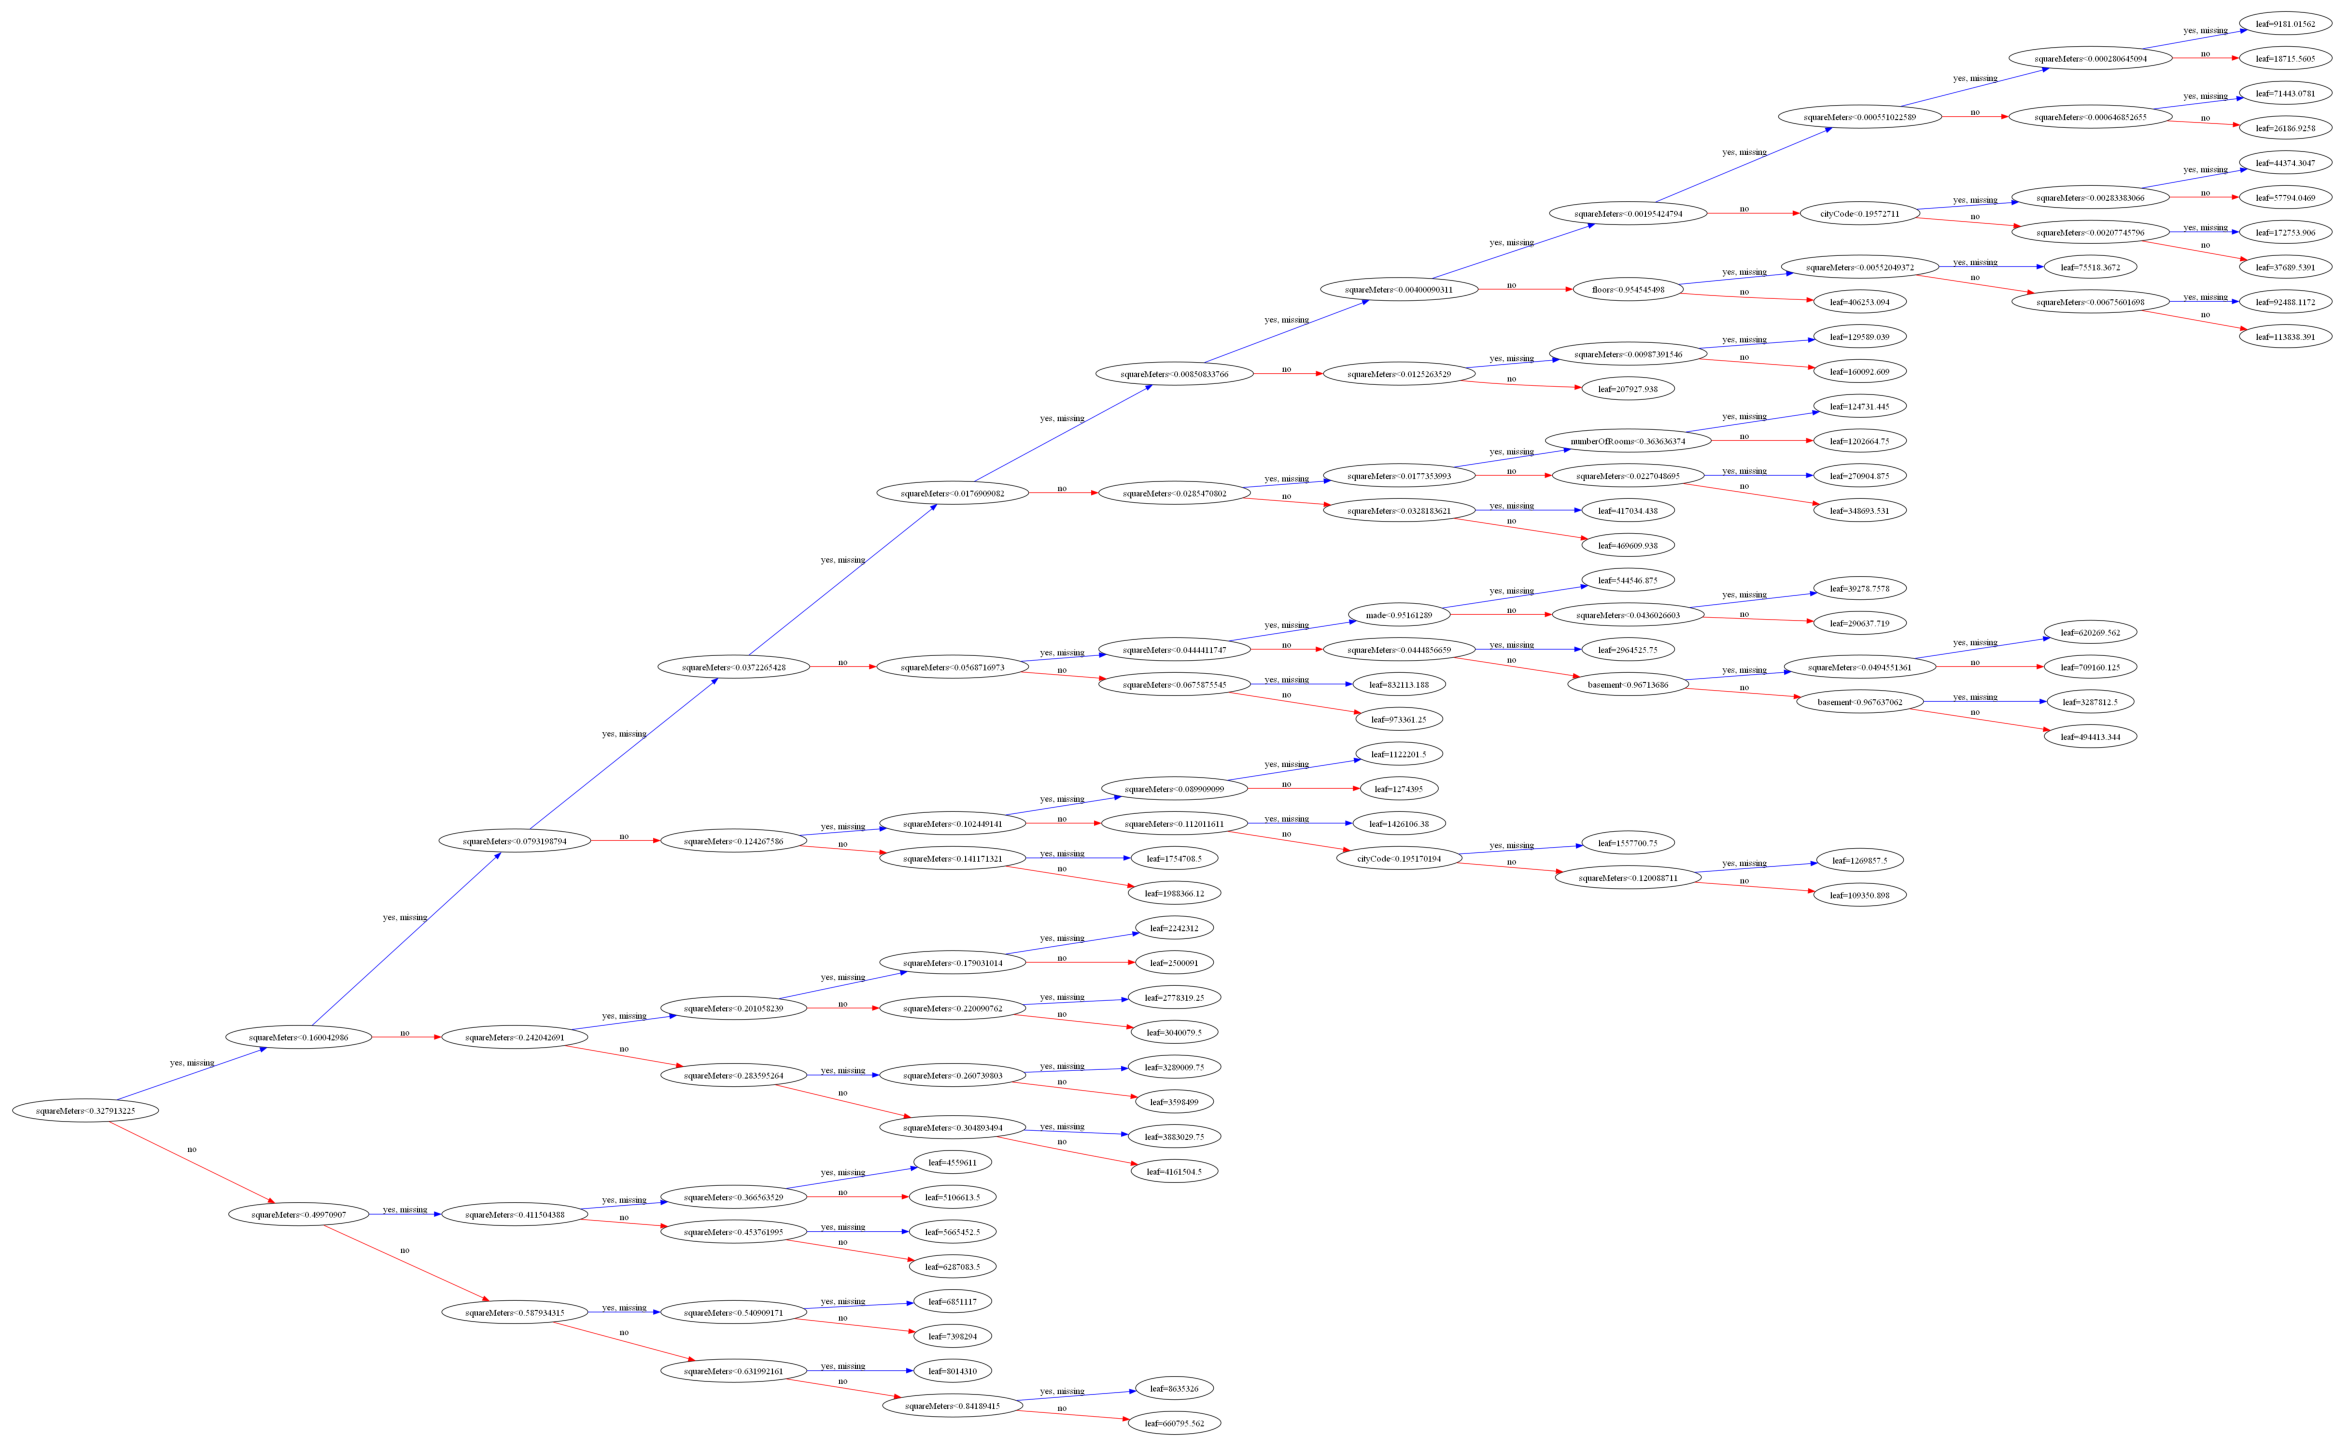

In [77]:
plot_tree(XGBR_1, rankdir='LR', num_trees=0);

<a id="model_interprete"></a>
### 8.2 Feature Importance
<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [66]:
importance_df = pd.DataFrame({
    'feature': X_val.columns,
    'importance': XGBR.feature_importances_
}).sort_values('importance', ascending=False)

In [67]:
importance_df.head()

feature  importance
0   squareMeters        0.85
5           made        0.03
1  numberOfRooms        0.02
8         garage        0.02
9   hasGuestRoom        0.02

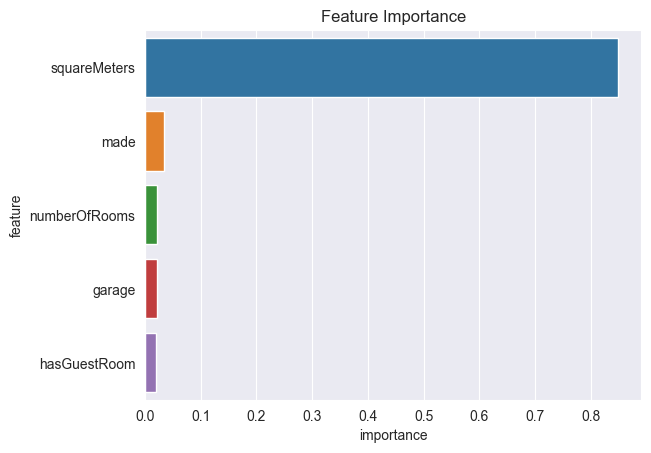

In [68]:
sns.barplot(data=importance_df.head(), x='importance', y='feature')
plt.title('Feature Importance');

<a id="submission"></a>
## 9. Submission

<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [69]:
test_preds = XGBR_1.predict(X_test)

In [70]:
test_preds

array([4762046. , 6226996. , 9055228. , ..., 7373877. , 7765953. ,
       1820783.6], dtype=float32)

In [71]:
submission_df['price'] = test_preds

In [72]:
submission_df

id      price
0      22730 4762046.00
1      22731 6226996.00
2      22732 9055228.00
3      22733 1639109.88
4      22734 6741574.00
...      ...        ...
15149  37879 8643771.00
15150  37880 4594517.00
15151  37881 7373877.00
15152  37882 7765953.00
15153  37883 1820783.62

[15154 rows x 2 columns]

In [73]:
submission_df.to_csv('submission.csv', index=None)

<a id="save_model"></a>
## 10. Save Model

<a href="#table_of_contents" style="text-decoration: none;">Table of Contents</a>

In [81]:
import joblib

In [82]:
joblib.dump(XGBR_1, 'tunned_xgboost_joblib')

['tunned_xgboost_joblib']